In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("global-data-on-sustainable-energy.csv")
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [4]:
data.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [5]:
a = np.zeros(21, dtype="int") 
y = np.zeros(21, dtype="int")


for i in range(21):
    a[i] = len(data[data["Year"] == 2000+i])
    y[i] = 2000+i

Country_Amount = pd.DataFrame({"Year":y, "Amount":a})

Country_Amount

,Year,Amount
0,2000,173
1,2001,172
2,2002,172
3,2003,172
4,2004,172
5,2005,172
6,2006,172
7,2007,174
8,2008,174
9,2009,174


In [6]:
data["Entity"].value_counts()

Entity
Afghanistan      21
Oman             21
Netherlands      21
New Caledonia    21
New Zealand      21
                 ..
Zimbabwe         21
Serbia           14
Montenegro       14
South Sudan       8
French Guiana     1
Name: count, Length: 176, dtype: int64

In [7]:
entity_counts = data["Entity"].value_counts()

eligible_entities = entity_counts[entity_counts == 21].index
Eligible = data[data["Entity"].isin(eligible_entities)]

ineligible_entities = entity_counts[entity_counts != 21].index
Ineligible = data[data["Entity"].isin(ineligible_entities)]

In [8]:
Ineligible["Entity"].value_counts()

Entity
Montenegro       14
Serbia           14
South Sudan       8
French Guiana     1
Name: count, dtype: int64

In [9]:
Eligible["Entity"].value_counts().sort_index()

Entity
Afghanistan            21
Albania                21
Algeria                21
Angola                 21
Antigua and Barbuda    21
                       ..
Uzbekistan             21
Vanuatu                21
Yemen                  21
Zambia                 21
Zimbabwe               21
Name: count, Length: 172, dtype: int64

In [10]:
Eligible.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                                9
Access to clean fuels for cooking                                    168
Renewable-electricity-generating-capacity-per-capita                 903
Financial flows to developing countries (US $)                      2058
Renewable energy share in the total final energy consumption (%)     191
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          199
Value_co2_emissions_kt_by_country                  

In [11]:
Eligible.drop(["Financial flows to developing countries (US $)",
               "Renewables (% equivalent primary energy)"], axis = 1, inplace = True) # Too many missing values
Eligible.drop(["Latitude", "Longitude", "Land Area(Km2)", "Density\\n(P/Km2)"], axis = 1, inplace=True) # Irrelevant
Eligible.drop(['gdp_growth'], axis=1, inplace=True)

C:\Users\Nico\AppData\Local\Temp\ipykernel_9820\1985937368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eligible.drop(["Financial flows to developing countries (US $)",
C:\Users\Nico\AppData\Local\Temp\ipykernel_9820\1985937368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eligible.drop(["Latitude", "Longitude", "Land Area(Km2)", "Density\\n(P/Km2)"], axis = 1, inplace=True) # Irrelevant
C:\Users\Nico\AppData\Local\Temp\ipykernel_9820\1985937368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [12]:
def fillBlankByEntityyMean(colName):
    meanByEntity = Eligible.groupby('Entity')[colName].transform('mean')
    Eligible[colName].fillna(meanByEntity, inplace = True)

In [13]:
fillBlankByEntityyMean('Electricity from fossil fuels (TWh)')
fillBlankByEntityyMean('Electricity from nuclear (TWh)')
fillBlankByEntityyMean('Electricity from renewables (TWh)')
fillBlankByEntityyMean('Low-carbon electricity (% electricity)')
fillBlankByEntityyMean('Value_co2_emissions_kt_by_country')
fillBlankByEntityyMean('Access to clean fuels for cooking')
fillBlankByEntityyMean('Renewable energy share in the total final energy consumption (%)')
fillBlankByEntityyMean('Energy intensity level of primary energy (MJ/$2017 PPP GDP)')

Eligible['Access to electricity (% of population)'].fillna(0, inplace = True)
Eligible['Renewable-electricity-generating-capacity-per-capita'].fillna(0, inplace = True)

C:\Users\Nico\AppData\Local\Temp\ipykernel_9820\2856198078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eligible[colName].fillna(meanByEntity, inplace = True)
C:\Users\Nico\AppData\Local\Temp\ipykernel_9820\2856198078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eligible[colName].fillna(meanByEntity, inplace = True)
C:\Users\Nico\AppData\Local\Temp\ipykernel_9820\2856198078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [14]:
Eligible.isnull().sum()

Entity                                                                0
Year                                                                  0
Access to electricity (% of population)                               0
Access to clean fuels for cooking                                   168
Renewable-electricity-generating-capacity-per-capita                  0
Renewable energy share in the total final energy consumption (%)     21
Electricity from fossil fuels (TWh)                                  21
Electricity from nuclear (TWh)                                      126
Electricity from renewables (TWh)                                    21
Low-carbon electricity (% electricity)                               42
Primary energy consumption per capita (kWh/person)                    0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          21
Value_co2_emissions_kt_by_country                                   252
gdp_per_capita                                                  

In [15]:
print(Eligible.shape)
Eligible = Eligible.dropna()
print(Eligible.shape)
Eligible.isnull().sum()

(3612, 14)
(3009, 14)


Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_per_capita                                                      0
dtype: int64

In [68]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression

In [17]:
from sklearn.preprocessing import FunctionTransformer

scaler = FunctionTransformer(np.log1p)

colName = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)', 
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country']

for i in colName:
    Eligible[i] = scaler.fit_transform(Eligible[i].values.reshape(-1, 1))

In [18]:
def categorize(row, limiters, percentiles):
    year = row['Year']
    val = row['gdp_per_capita']
    
    q = np.zeros(len(limiters))
    
    for i in range(len(limiters)):
        q[i] = percentiles.loc[year, limiters[i]]
    
    pos = 0
    
    for i in q:
        if val <= i:
            break
        else:
            pos+=1
    return pos

In [ ]:
category_min = 2
category_max = 10
loop = 25

category_max += 1

In [36]:
from sklearn.svm import SVC

accuracy = np.zeros(category_max)
for i in range (category_min, category_max):
    category_amt = i
    limiters = np.arange(1/category_amt,1,1/category_amt)
    dataset = Eligible

    dataset['gdp_per_capita_category'] = np.nan
    percentiles = dataset.groupby('Year')['gdp_per_capita'].quantile(limiters).unstack()

    dataset['gdp_per_capita_category'] = dataset.apply(categorize, args=(limiters, percentiles),axis=1)

    x = dataset.drop(['gdp_per_capita_category', 'gdp_per_capita', 'Entity', 'Year'], axis = 1)
    y = dataset['gdp_per_capita_category']

    acc = 0
    
    for j in range(loop):
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

        model = SVC(kernel='linear')
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        acc += metrics.accuracy_score(prediction, y_test)

    accuracy[i] = (acc/loop)

In [37]:
xval = np.arange(category_min,category_max,1)
yval = accuracy[category_min:]

xvalp = xval.reshape(-1,1)

calc = LinearRegression()
calc.fit(xvalp, yval)

ypred = calc.predict([[category_min], [category_max-1]])

In [39]:
from sklearn.linear_model import LogisticRegression

accuracy2 = np.zeros(category_max)
for i in range (category_min, category_max):
    category_amt = i
    limiters = np.arange(1/category_amt,1,1/category_amt)
    dataset = Eligible

    dataset['gdp_per_capita_category'] = np.nan
    percentiles = dataset.groupby('Year')['gdp_per_capita'].quantile(limiters).unstack()

    dataset['gdp_per_capita_category'] = dataset.apply(categorize, args=(limiters, percentiles),axis=1)

    x = dataset.drop(['gdp_per_capita_category', 'gdp_per_capita', 'Entity', 'Year'], axis = 1)
    y = dataset['gdp_per_capita_category']

    acc = 0
    
    for j in range(loop):
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

        model = LogisticRegression()
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        acc += metrics.accuracy_score(prediction, y_test)

    accuracy2[i] = (acc/loop)

c:\Users\Nico\anaconda3\envs\default\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Nico\anaconda3\envs\default\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [40]:
xval = np.arange(category_min,category_max,1)
yval2 = accuracy2[category_min:]

xvalp = xval.reshape(-1,1)

calc = LinearRegression()
calc.fit(xvalp, yval2)

ypred2 = calc.predict([[category_min], [category_max-1]])

In [54]:
from sklearn.ensemble import RandomForestClassifier

accuracy3 = np.zeros(category_max)
for i in range (category_min, category_max):
    category_amt = i
    limiters = np.arange(1/category_amt,1,1/category_amt)
    dataset = Eligible

    dataset['gdp_per_capita_category'] = np.nan
    percentiles = dataset.groupby('Year')['gdp_per_capita'].quantile(limiters).unstack()

    dataset['gdp_per_capita_category'] = dataset.apply(categorize, args=(limiters, percentiles),axis=1)

    x = dataset.drop(['gdp_per_capita_category', 'gdp_per_capita', 'Entity', 'Year'], axis = 1)
    y = dataset['gdp_per_capita_category']

    acc = 0
    
    for j in range(loop):
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

        model = RandomForestClassifier()
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        acc += metrics.accuracy_score(prediction, y_test)

    accuracy3[i] = (acc/loop)

In [55]:
xval = np.arange(category_min,category_max,1)
yval3 = accuracy3[category_min:]

xvalp = xval.reshape(-1,1)

calc = LinearRegression()
calc.fit(xvalp, yval3)

ypred3 = calc.predict([[category_min], [category_max-1]])

[]

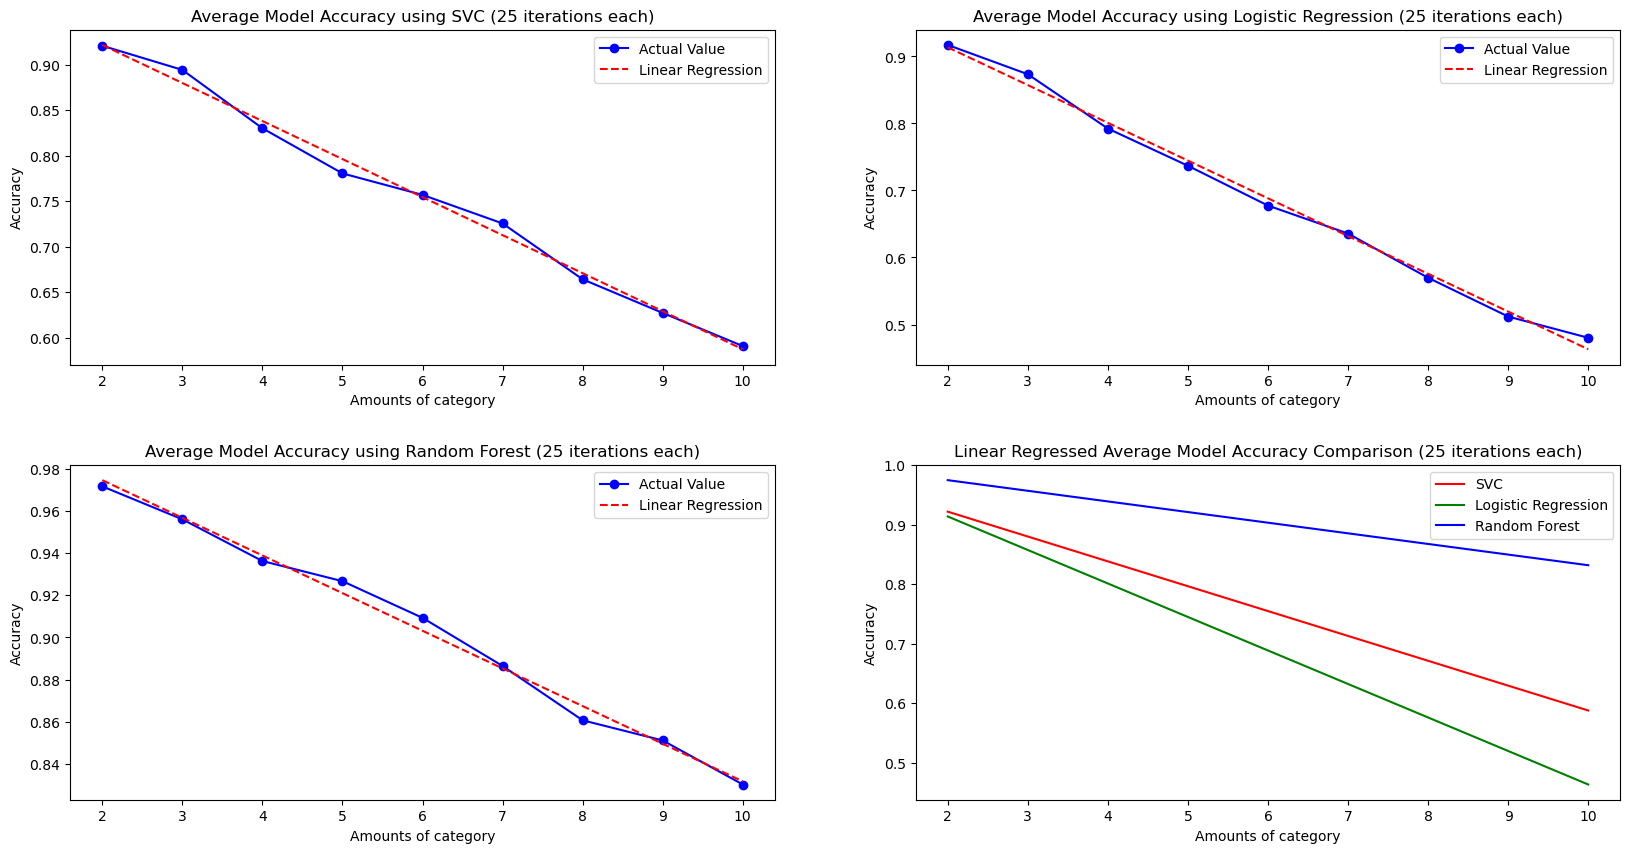

In [67]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))
plt.subplots_adjust(hspace=0.3)

ax[0,0].plot(xval, yval, 'bo-')
ax[0,0].plot([category_min, category_max-1], ypred, 'r--')
ax[0,0].set_xticks(xval)
ax[0,0].set_xlabel('Amounts of category')
ax[0,0].set_ylabel('Accuracy')
ax[0,0].legend(labels=['Actual Value', 'Linear Regression'])
ax[0,0].set_title(f'Average Model Accuracy using SVC ({loop} iterations each)')
ax[0,0].plot()

ax[0,1].plot(xval, yval2, 'bo-')
ax[0,1].plot([category_min, category_max-1], ypred2, 'r--')
ax[0,1].set_xticks(xval)
ax[0,1].set_xlabel('Amounts of category')
ax[0,1].set_ylabel('Accuracy')
ax[0,1].legend(labels=['Actual Value', 'Linear Regression'])
ax[0,1].set_title(f'Average Model Accuracy using Logistic Regression ({loop} iterations each)')
ax[0,1].plot()

ax[1,0].plot(xval, yval3, 'bo-')
ax[1,0].plot([category_min, category_max-1], ypred3, 'r--')
ax[1,0].set_xticks(xval)
ax[1,0].set_xlabel('Amounts of category')
ax[1,0].set_ylabel('Accuracy')
ax[1,0].legend(labels=['Actual Value', 'Linear Regression'])
ax[1,0].set_title(f'Average Model Accuracy using Random Forest ({loop} iterations each)')
ax[1,0].plot()

ax[1,1].plot([category_min, category_max-1], ypred, 'r-')
ax[1,1].plot([category_min, category_max-1], ypred2, 'g-')
ax[1,1].plot([category_min, category_max-1], ypred3, 'b-')
ax[1,1].set_xticks(xval)
ax[1,1].set_xlabel('Amounts of category')
ax[1,1].set_ylabel('Accuracy')
ax[1,1].legend(labels=['SVC', 'Logistic Regression', 'Random Forest'])
ax[1,1].set_title(f'Linear Regressed Average Model Accuracy Comparison ({loop} iterations each)')
ax[1,1].plot()